In [1]:
''' Testsript for predicting CVD-Mortality across Germany wih different AI Methods
'''

import numpy as np
import pandas as pd
import os
import nbimporter
from Plots import *
from Prediction import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Load Data

In [2]:
# Set the working directory
os.chdir("N:/WG_ENRI/20_projects/Noise2NAKO/04_data/grid_prediction/3_output")
grid_path = "N:/PROJECTS/ENVGEO_DB/1_GIS_data_orig/2_administrative_units/BKG/INSPIRE_geogitter/DE_Grid_ETRS89-LAEA/data/DE_Grid_ETRS89-LAEA_5km.gpkg"

In [3]:
# Read training and test data
data_training_path = 'Prediction_data/Reduced_data_imp/Reduced_data_imp_meanPollutant_minmax_scaled_Training_data.csv'
data_test_path = 'Prediction_data/Reduced_data_imp/Reduced_data_imp_meanPollutant_minmax_scaled_Test_data.csv'
data_training = pd.read_csv(data_training_path, sep=',')
data_test = pd.read_csv(data_test_path, sep=',')

In [4]:
# distinguish between response and input variables and make training and validation data 

output_variable = 'cvd_mortality_17'
# 0_original_data
# 1_standard_scaled_data
# 2_minmax_scaled_data
output_path = 'CVD Mortality Rate 2017_allExposures_XY/Reduced_data_imp_meanPollutant_all/2_minmax_scaled_data'

output_path = '../5_results/' + output_path + '/'
y = data_training[output_variable]
X = data_training.drop([output_variable, 'id'], axis = 1)   
y_test = data_test[output_variable]
X_test = data_test.drop([output_variable, 'id'], axis = 1)
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10)

### Prediction with different methods

In [5]:
# Build and train all the models for all specified methods and save them for the future
# It is gonna make a folder named 'trained_models' in the working directory and save the built and trained models there

# methods = ['LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'GAM', 'KNN', 'SVR', 'RF', 'AdaB', 'XGBoost', 'MLP']
# models = Build_fit_all_methods(methods, X_train, y_train)

In [6]:
# result = pd.DataFrame(columns=['Method', 'MSE_train', 'MAE_train', 'R_2_train', 'MSE_val', 'MAE_val', 'R_2_val', 'MSE_pred', 'MAE_pred', 'R_2_pred'])
# # methods = ['LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'GAM', 'KNN', 'SVR', 'RF', 'AdaB', 'XGBoost', 'MLP']
# methods = ['LR_Ridge']
# preds = pd.DataFrame()
# preds['GT'] = y_test

# grid_5km_shp = gpd.read_file(grid_path)

# for i in methods:
#     model = Build_fit_model(i, X_train, y_train)
#     models.append(model)
#     ToAppend, y_pred, trained_model = Prediction(i, X_train, X_val, y_train, y_val, X_test, y_test, output_variable,
#                                  output_path, data_training, data_test, grid_5km_shp, model)
#     print(i + ' is done!\n')
#     result = result.append(ToAppend, ignore_index=True)
#     preds[i] = y_pred
    
# result.to_csv(output_path + 'PredictionTask_results_allMethods.csv', index=False, sep=',')
# result.round(decimals=3).to_csv(output_path + 'PredictionTask_results_allMethods_round.csv', index=False, sep=',')

# result

In [7]:
result = pd.DataFrame(columns=['Method', 'MSE_train', 'MAE_train', 'R_2_train', 'MSE_pred', 'MAE_pred', 'R_2_pred'])
methods = ['LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'GAM', 'KNN', 'SVR', 'RF', 'AdaB', 'XGBoost', 'MLP']
preds = pd.DataFrame()
preds['GT'] = y_test
models = []

grid_5km_shp = gpd.read_file(grid_path)

for i in methods:
    model = Build_fit_model(i, X, y)
    models.append(model)
    ToAppend, y_pred, trained_model = Prediction_without_validation(i, X, y, X_test, y_test, output_variable,
                                 output_path, data_training, data_test, grid_5km_shp, model)
    print(i + ' is done!\n')
    result = result.append(ToAppend, ignore_index=True)
    preds[i] = y_pred
    
result.to_csv(output_path + 'PredictionTask_results_allMethods.csv', index=False, sep=',')
result.round(decimals=3).to_csv(output_path + 'PredictionTask_results_allMethods_round.csv', index=False, sep=',')

result

Parameters for LR
{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}
LR is running ... 
LR results:
{'MAE_pred': 0.09510791937010438,
 'MAE_train': 0.037958511042399244,
 'MSE_pred': 0.01700857637686316,
 'MSE_train': 0.0028021769104390804,
 'Method': 'LR',
 'R_2_pred': 0.4725828858195875,
 'R_2_train': 0.9156490275533858}
LR is done!

Runnig Random Search for hyper-parameter Tuning when Scoring is R-squared for LR_Ridge ..... 
{'cv': [5, 10]}
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Parameters for LR_Ridge
{'alpha_per_target': False,
 'alphas': array([ 0.1,  1. , 10. ]),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'normalize': False,
 'scoring': None,
 'store_cv_values': False}
LR_Ridge is running ... 
LR_Ridge results:
{'MAE_pred': 0.10091729098264707,
 'MAE_train': 0.04041641214609932,
 'MSE_pred': 0.017979404739506967,
 'MSE_train': 0.0031765074923084586,
 'Method': 'LR_Ridge',
 'R_2_pred': 0.4424785736158

100% (11 of 11) |########################| Elapsed Time: 0:00:19 Time:  0:00:19


Parameters for GAM
{'callbacks': [Deviance(), Diffs()],
 'distribution': NormalDist(),
 'fit_intercept': True,
 'link': IdentityLink(),
 'max_iter': 100,
 'terms': s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + s(13) + s(14) + s(15) + s(16) + s(17) + s(18) + s(19) + s(20) + s(21) + s(22) + s(23) + intercept,
 'tol': 0.0001,
 'verbose': False}
GAM is running ... 
GAM results:
{'MAE_pred': 0.08948707496646151,
 'MAE_train': 0.009559421555609945,
 'MSE_pred': 0.013597327889249751,
 'MSE_train': 0.00018829817440569317,
 'Method': 'GAM',
 'R_2_pred': 0.5783619230079529,
 'R_2_train': 0.9943318588980331}
GAM is done!

Runnig Random Search for hyper-parameter Tuning when Scoring is R-squared for KNN ..... 
{'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'leaf_size': [1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
      

Parameters for MLP
{'activation': 'identity',
 'alpha': 0.05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 50, 30),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 100,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}
MLP is running ... 
MLP results:
{'MAE_pred': 0.10961015542695494,
 'MAE_train': 0.0428478743237698,
 'MSE_pred': 0.021247608683711863,
 'MSE_train': 0.0034047842148519007,
 'Method': 'MLP',
 'R_2_pred': 0.34113518927768516,
 'R_2_train': 0.8975093762197056}
MLP is done!



,Method,MSE_train,MAE_train,R_2_train,MSE_pred,MAE_pred,R_2_pred
0,LR,0.002802,0.037959,0.915649,0.017009,0.095108,0.472583
1,LR_Ridge,0.003177,0.040416,0.904381,0.017979,0.100917,0.442479
2,LR_Lasso,0.004847,0.050883,0.854096,0.016521,0.097533,0.487701
3,LR_Elastic,0.004798,0.050342,0.855584,0.016613,0.097676,0.484859
4,GAM,0.000188,0.009559,0.994332,0.013597,0.089487,0.578362
5,KNN,0.002647,0.034150,0.920321,0.019849,0.106938,0.384515
6,SVR,0.004107,0.055526,0.876358,0.013995,0.086866,0.566038
7,RF,0.000176,0.005967,0.994715,0.019013,0.104352,0.410442
8,AdaB,0.001525,0.029999,0.954099,0.014849,0.093636,0.539553
9,XGBoost,0.000003,0.001279,0.999901,0.011864,0.079569,0.632104


### Make maps

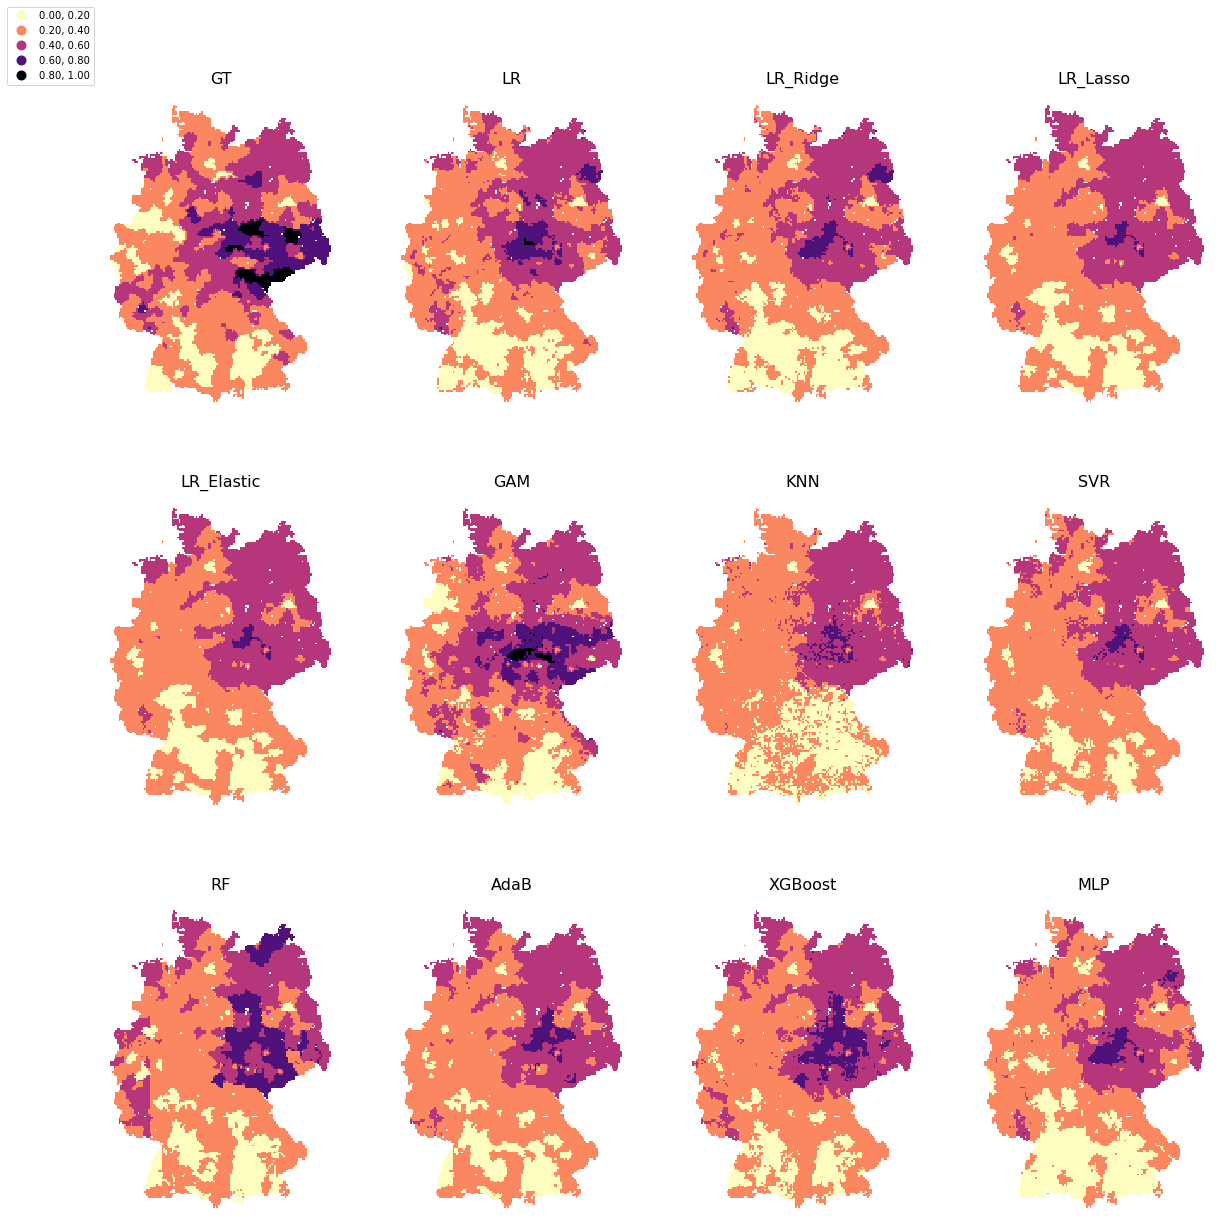

In [8]:
# Maps of predictions

grid_5km_shp = gpd.read_file(grid_path)
GT = pd.read_csv(output_path + 'GT/GT.csv', sep=',')
merged_data_GT = grid_5km_shp.merge(GT, left_on="id", right_on="id")
merged_data_GT.to_file(driver = 'ESRI Shapefile', filename= output_path + 'GT/GT_shape.shp')

to_plot = ['GT', 'LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'GAM', 'KNN', 'SVR', 'RF', 'AdaB', 'XGBoost', 'MLP']

# Bins suggested for the scaled data with MinMax Scaling ---  bins= [0.2, 0.4, 0.6, 0.8, 1]
# Bins suggested for the scaled data with Standard scaling --- bins = [-2, -1, 0, 1, 2]
# Bins suggested for the original data --- [3, 4, 5, 6, 8, 10]

all_maps_plot(output_path, to_plot, number_of_columns= 4, color_map= 'magma_r', file_name= 'Plots/all_methods_maps',
            bins= [0.2, 0.4, 0.6, 0.8, 1], output_var='cvd_mortal') 

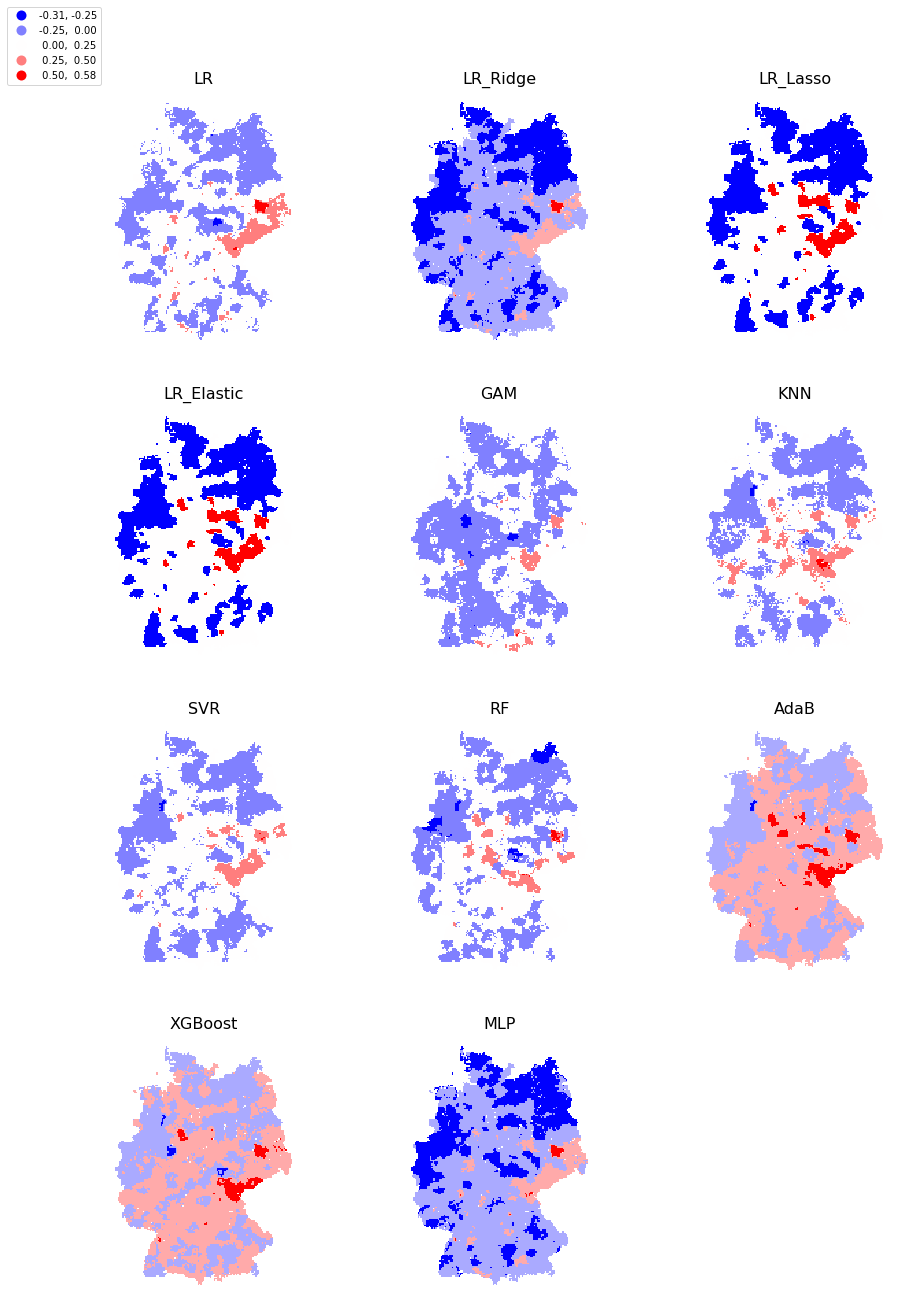

In [9]:
# Maps of differences between the ground truth and the predictions

methods_to_plot = ['LR', 'LR_Ridge', 'LR_Lasso', 'LR_Elastic', 'GAM', 'KNN', 'SVR', 'RF', 'AdaB', 'XGBoost', 'MLP']
for i in range(len(methods_to_plot)):
    if methods_to_plot[i] != 'GT':
        methods_to_plot[i] = 'diff_' + methods_to_plot[i]
        
# Bins suggested for the scaled data with MinMax Scaling ---  bins= [-0.25, 0, 0.25, 0.5]
# Bins suggested for the scaled data with Standard scaling --- bins = [-1, 0, 1, 2.5]
# Bins suggested for the original data --- [-1, 0, 1, 2.5, 3.5]

all_maps_plot(output_path, methods_to_plot, 3, color_map= 'bwr', file_name= 'Plots/diff_all_methods_maps',
              bins = [-0.25, 0, 0.25, 0.5], output_var='cvd_mortal')

### Make performance correlation plots

<Figure size 432x288 with 0 Axes>

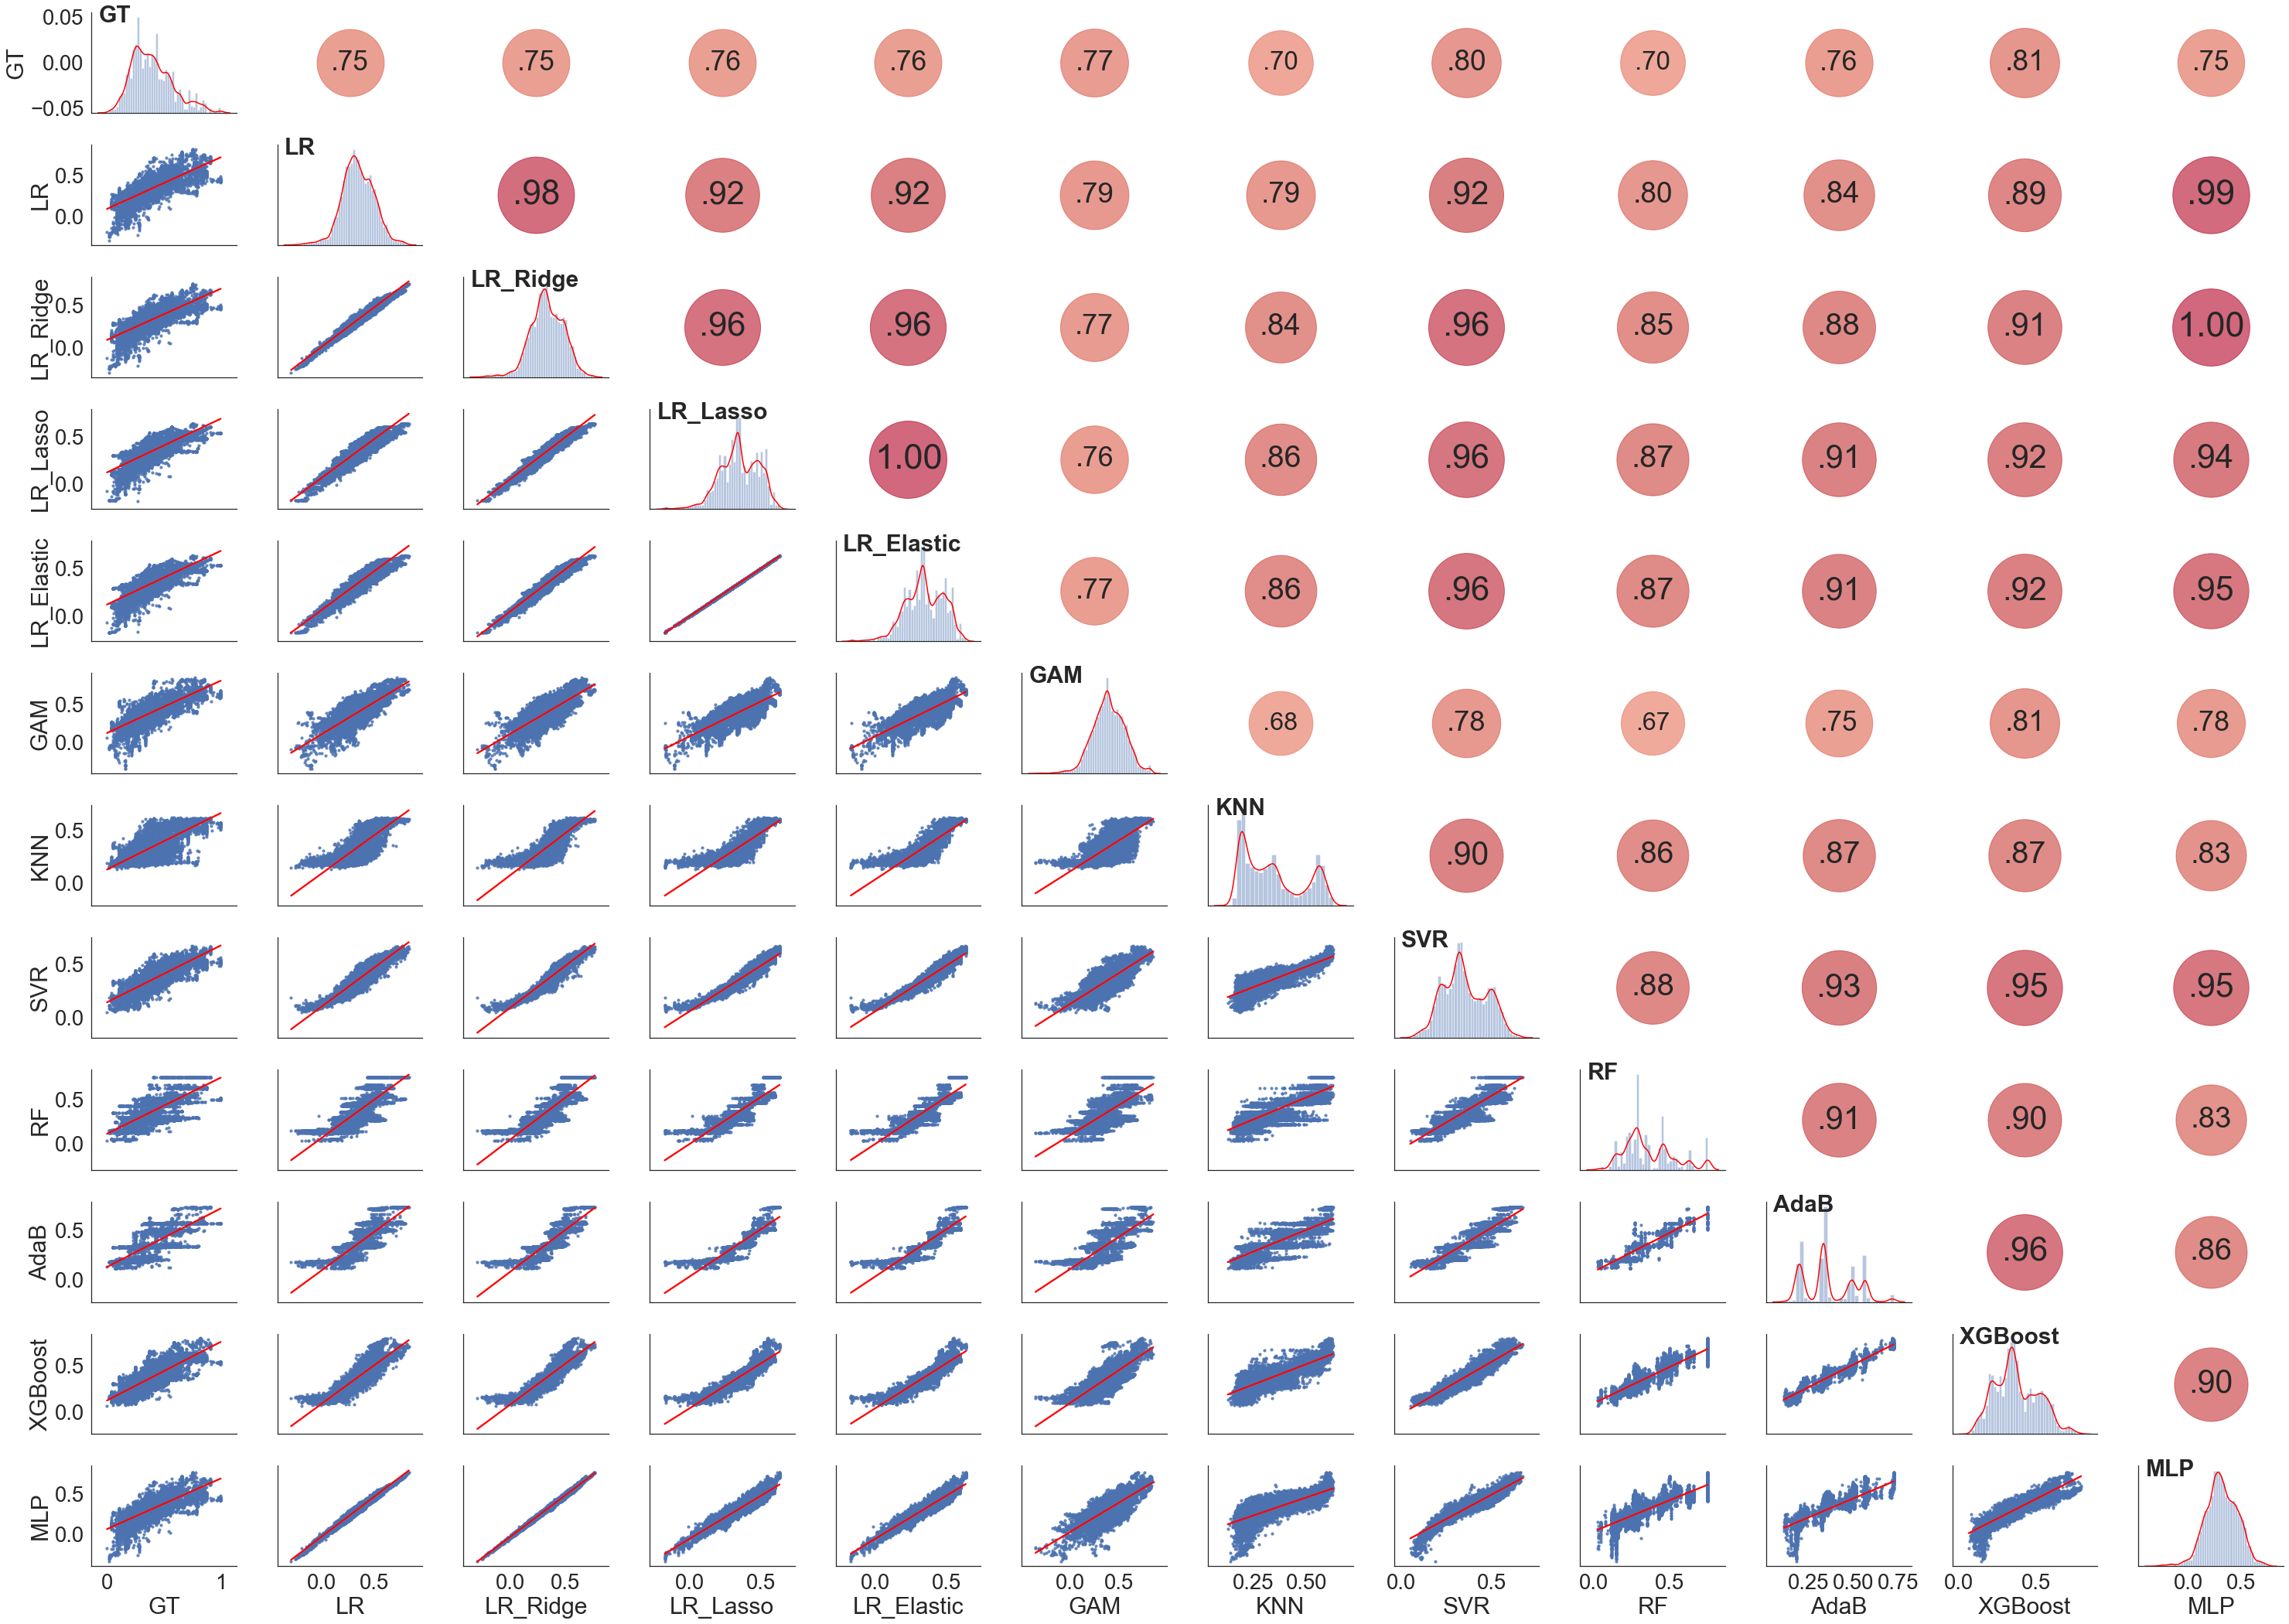

In [10]:
results_corr_plot(preds, output_path + 'Plots/scatter_corr')